In [1]:

# %% 
# ME EN 4650  Lab7:Airfoil Aerodynamics    Ryan Dalby    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import matlab.engine # Must install from matlab installation direcotry using: cd "matlabroot\extern\engines\python" && python setup.py install 


In [2]:
# Define useful functions
mmhg_to_pa = lambda mmhg : mmhg*133.3 # Lambda function to covert mmHg to Pa
inh2o_to_pa = lambda inh2o : inh2o*249.04 # Lambda function to covert inH20 to Pa
in_to_m = lambda inch : inch*0.0254 # Lambda function to convert in to m

# Define parameters
root_filepath = Path('./lab_data') # Data files will be assumed to be contained in ./lab_data
P_atm = 664 # Measured atmospheric pressure in lab minus the offset for Salt Lake City Utah in mmHg
air_temp = 21 # Measured temperature in lab in deg C 
v_air = 1.516e-5 # Kinematic viscosity of air at 20 degC in m**2/s
rho_air = 1.2041  # Density of air at 20 degC in kg/m**3
alpha = np.arange(0, 16+1, 1)
N = np.size(alpha)  # Total number of angle of attacks investigated 
g = 9.81 # Gravitational constant in m/s**2

# Define recorded data
Pdyn = inh2o_to_pa(1.616) # Dynamic pressure upstream of airfoil in Pa 
c = in_to_m(4) # Cord length of NACA 0012 in m
s = in_to_m(12) # Span of NACA 0012 in m
Ap = s*c # Planform area in m**2
U_inf = np.sqrt((Pdyn * 2 / rho_air)) # Freestream speed in m/s
Re = U_inf*c/v_air  # Cord Reynolds number for experiment
P_output_xc_vals = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]) # Corresponding P_output x/c values
P_output_nonstall_top = inh2o_to_pa(np.array([-2.6, -1.83, -1.41, -0.91, -0.73, -0.57, -0.43, -0.27, -0.12])) # Top surface pressure readings for alpha = 5 deg in units of Pa
P_output_nonstall_bottom = inh2o_to_pa(np.array([0.74, 0.16, -0.11, -0.20, -0.23, -0.24, -0.22, -0.20, -0.16])) # Bottom surface pressure readings for alpha = 5 deg in units of Pa
P_output_stall_top = inh2o_to_pa(np.array([-1.2, -1.2, -1.2, -1.1, -1.1, -1.0, -0.90, -0.93, -0.82])) # Top surface pressure readings for alpha = 12 deg in units of Pa
P_output_stall_bottom = inh2o_to_pa(np.array([0.96, 0.38, 0.02, -0.14, -0.24, -0.32, -0.40, -0.45, -0.50])) # Bottom surface pressure readings for alpha = 12 deg in units of Pa

# Read published data
published_data = pd.read_csv((root_filepath/'NACA0012_SheldahlKlimas1981.csv'), header=None, skiprows=5)
Re_pub = np.array([1e4,2e4,4e4,8e4,1.6e5,3.6e5,7e5,1e6,2e6,5e6])
CL_pub = published_data.iloc[:,0::2]
CD_pub = published_data.iloc[:,1::2]
alpha_pub = np.arange(published_data.shape[0]) # Published angle of attack values 

# Read baseline 
baseline_data = np.loadtxt((root_filepath / 'lift_drag_baseline.txt'))
L_base = np.mean(baseline_data[:,0])
D_base = np.mean(baseline_data[:,1])

Lavg = []
Lerr = []
Davg = []
Derr = []
n = 15*8 # Number of independent smaples in a single sample (8 independent samples for a 15 second sample)
# Read data
for i in range(N):
    filename = 'lift_drag_deg{0}.txt'.format(i)
    data = np.loadtxt((root_filepath/filename))
    L = (data[:,0]-L_base)*g # Lift in N
    D = (data[:,1]-D_base)*g # Drag in N
    Lavg.append(np.mean(L))
    Davg.append(np.mean(np.abs(D)))
    Lerr.append((np.std(L)/np.sqrt(n)))
    Derr.append((np.std(D)/np.sqrt(n)))
Lavg = np.array(Lavg) # Lift in N
Davg = np.array(Davg) # Drag in N
Lerr = np.array(Lerr) # Lift error in N
Derr = np.array(Derr) # Drag error in N


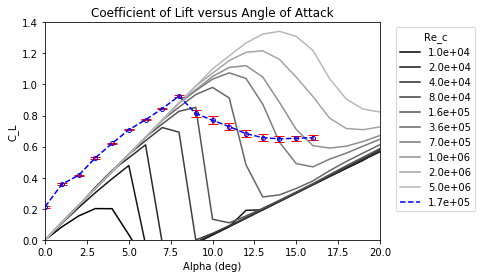

In [3]:
# 1a 
# Coefficient of lift 
CL = Lavg/(Pdyn*c*s)
CL_err = Lerr/(Pdyn*c*s)

# Plot published data
plt.figure()
col_scale = Re_pub.size * 1.25
for i in range(Re_pub.size):
    plt.plot(alpha_pub, CL_pub.iloc[:,i], color = (i/col_scale, i/col_scale, i/col_scale))
legend_str = ['{:.1e}'.format(i) for i in Re_pub]
plt.title('Coefficient of Lift versus Angle of Attack')
plt.xlim((0, 20))
plt.ylim((0,1.4))
plt.xlabel('Alpha (deg)')
plt.ylabel('C_L')
# Plot experimental data
CL_err_plusminus = 2*CL_err
plt.errorbar(alpha, CL, yerr=CL_err_plusminus, marker='o', color='b', ecolor='r', markersize=4, markerfacecolor='None', capsize=5, linestyle='None')
plt.plot(alpha, CL, 'b--')
legend_str.append('{:.1e}'.format(Re))
plt.legend(legend_str,title='Re_c', bbox_to_anchor=(1.3,1), loc="upper right")
plt.show()


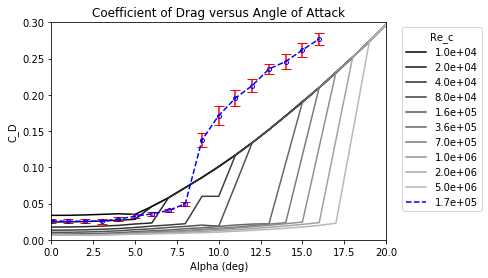

In [4]:
# 1b 
# Coefficient of drag 
CD = Davg/(Pdyn*c*s)
CD_err = Derr/(Pdyn*c*s)

# Plot published data
plt.figure()
col_scale = Re_pub.size * 1.25
for i in range(Re_pub.size):
    plt.plot(alpha_pub, CD_pub.iloc[:,i], color = (i/col_scale, i/col_scale, i/col_scale))
legend_str = ['{:.1e}'.format(i) for i in Re_pub]
plt.title('Coefficient of Drag versus Angle of Attack')
plt.xlim((0, 20))
plt.ylim((0,0.3))
plt.xlabel('Alpha (deg)')
plt.ylabel('C_D')
# Plot experimental data
CD_err_plusminus = 2*CD_err
plt.errorbar(alpha, CD, yerr=CD_err_plusminus, marker='o', color='b', ecolor='r', markersize=4, markerfacecolor='None', capsize=5, linestyle='None')
plt.plot(alpha, CD, 'b--')
legend_str.append('{:.1e}'.format(Re))
plt.legend(legend_str,title='Re_c', bbox_to_anchor=(1.3,1), loc="upper right")
plt.show()



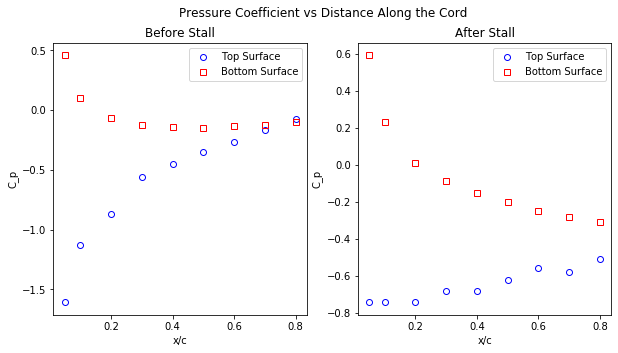

In [5]:
# 1c 
# Pressure coefficient
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Pressure Coefficient vs Distance Along the Cord')
ax1.set_title('Before Stall')
ax1.set_xlabel('x/c')
ax1.set_ylabel('C_p')
ax1.plot(P_output_xc_vals, (P_output_nonstall_top/Pdyn), 'bo', markerfacecolor='None')
ax1.plot(P_output_xc_vals, (P_output_nonstall_bottom/Pdyn), 'rs', markerfacecolor='None')
ax1.legend(['Top Surface', 'Bottom Surface'])

ax2.set_title('After Stall')
ax2.set_xlabel('x/c')
ax2.set_ylabel('C_p')
ax2.plot(P_output_xc_vals, (P_output_stall_top/Pdyn), 'bo', markerfacecolor='None')
ax2.plot(P_output_xc_vals, (P_output_stall_bottom/Pdyn), 'rs', markerfacecolor='None')
ax2.legend(['Top Surface', 'Bottom Surface'])
plt.show()


In [6]:
# 2a 
alpha_stall = 8 # Stall angle in deg
print('The angle of attack where stall occurs is approximately at alpha = {0} deg'.format(alpha_stall))


The angle of attack where stall occurs is approximately at alpha = 8 deg


In [7]:
# 2b 
CL_percent_uncertainty = np.average(100*(CL_err_plusminus/CL))
CD_percent_uncertainty = np.average(100*(CD_err_plusminus/CD))
print('The average percent uncertainty in CL is {0:.2f}%'.format(CL_percent_uncertainty))
print('The average percent uncertainty in CD is {0:.2f}%'.format(CD_percent_uncertainty))


The average percent uncertainty in CL is 1.98%
The average percent uncertainty in CD is 7.08%


In [8]:
# 2d
L_uav = in_to_m(4 * 12) # Length of UAV NACA 0012 wing in m
c_uav = in_to_m(6) # Length of UAV NACA 0012 wing in m
Ap_uav = L_uav * c_uav # Planform area of UAV NACA 0012 wing in m**2
U_inf_uav = Re *v_air/c_uav # Associated U_inf for the cord Reynolds number used in experiment in m/s
print('If the UAV was flying at {:.2f}m/s the results from the experiment would be applicable.'.format(U_inf_uav))

CL_max = np.max(CL)
f_lift_uav_max = CL_max * 0.5 * rho_air * U_inf_uav**2 * Ap_uav
uav_max_mass = f_lift_uav_max/g
print('The maximum lift coefficent for this experiment was {:.2f} which corresponds to a lift force of {:.2f}N thus the UAV could support a maximum of {:.2f}kg.'.format(CL_max, f_lift_uav_max, uav_max_mass))

If the UAV was flying at 17.24m/s the results from the experiment would be applicable.
The maximum lift coefficent for this experiment was 0.93 which corresponds to a lift force of 30.76N thus the UAV could support a maximum of 3.14kg.
